# <div style="text-align: center;"><u>**Fast food EDA - Aitor Pérez**</u></div>

### **#️⃣ Descripción del proyecto**
Este análisis exploratorio de datos (EDA) tiene como objetivo explorar un dataset de comida rápida, analizando aspectos nutricionales como calorías, grasas, sodio, y su relación con otras variables. El propósito es obtener información útil que permita entender mejor las características nutricionales de los productos ofrecidos por diversas cadenas de comida rápida.

### **🎯 Objetivo del Proyecto**
1. Comparar calorías por cadena para ver cuál ofrece productos menos calóricos.
2. Comprobar correlaciones entre `Calorías` con `Grasas`, `Sodio` y `Azucares`.
3. Impacto de grasas saturadas en el colesterol.
4. Identificar productos extremos (muy altos en calorías o sodio).
5. Evaluar salud según puntos de [Weight Watchers Points](https://www.weightwatchers.com/us/).

### **🧷 Importación de librerías**

In [1]:
# Cargar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

In [2]:
# Cargar datos y mostrar las primeras filas
df = pd.read_csv('./data/fastfood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1147 non-null   object
 1   Item                  1147 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


### **🧹 Limpieza de datos**

Viendo la estructura de las columnas, voy limpiarlas y aprovechar para pasarlas a castellano.

In [3]:
# Diccionario con los nombres en inglés y su equivalente "limpio" en castellano
columnas = {
    'Company': 'compania',
    'Item': 'producto',
    'Calories': 'calorias',
    'Calories from\nFat': 'calorias_grasa',
    'Total Fat\n(g)': 'grasa',
    'Saturated Fat\n(g)': 'grasa_saturada',
    'Trans Fat\n(g)': 'grasa_trans',
    'Cholesterol\n(mg)': 'colesterol',
    'Sodium \n(mg)': 'sodio',
    'Carbs\n(g)': 'carbohidratos',
    'Fiber\n(g)': 'fibra',
    'Sugars\n(g)': 'azucares',
    'Protein\n(g)': 'proteina',
    'Weight Watchers\nPnts': 'puntos_ww'
}

# Renombrar las columnas usando el diccionario
df = df.rename(columns=columnas)

# Verificar los cambios
df.head()

,compania,producto,calorias,calorias_grasa,grasa,grasa_saturada,grasa_trans,colesterol,sodio,carbohidratos,fibra,azucares,proteina,puntos_ww
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   compania        1147 non-null   object
 1   producto        1147 non-null   object
 2   calorias        1147 non-null   object
 3   calorias_grasa  642 non-null    object
 4   grasa           1091 non-null   object
 5   grasa_saturada  1091 non-null   object
 6   grasa_trans     1091 non-null   object
 7   colesterol      1147 non-null   object
 8   sodio           1147 non-null   object
 9   carbohidratos   1091 non-null   object
 10  fibra           1091 non-null   object
 11  azucares        1147 non-null   object
 12  proteina        1091 non-null   object
 13  puntos_ww       887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


Viendo la cantidad de `Dtype` = `object` que hay cuando deberían ser floats, decido cambiarles el tipo para que el análisis sea más preciso.

In [5]:
# Reemplazar valores no numéricos por NaN, hacer strip y luego convertir a numérico en el mismo loop
for col in df.columns[2:]:  # Empieza desde la tercera columna
    # Convertir la columna a numérico, en caso de no poder, será nulo, lo que me permite hacer el fillna posterior
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# Revisar valores nulos
df.isnull().sum()

compania            0
producto            0
calorias           14
calorias_grasa    517
grasa              68
grasa_saturada     68
grasa_trans        68
colesterol         28
sodio              15
carbohidratos      69
fibra              83
azucares           29
proteina           68
puntos_ww         271
dtype: int64

Antes de limpiar, voy a borrar duplicados y quitar espacios que puedan causar conflictos

In [7]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpiar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

Después de revisar los valores nulos, decido calcular `calorias_grasa`, eliminar los productos sin calorías (ya que no tienen contenido en las demás filas), rellenar los valores nulos restantes con 0 y luego calcular los `Weight Watchers points` utilizando su fórmula. Ambas columnas se pueden calcular si las filas tienen los datos necesarios.

In [8]:
# Calcular calorías_grasa solo si la columna 'grasa' no tiene valores nulos
df['calorias_grasa'] = df['grasa'].apply(lambda x: x * 9 if pd.notnull(x) else 0)

# Borramos las filas que no tengan valores en la columna 'calorias'
df = df.dropna(subset=['calorias'])

# Rellenamos los valores nulos de las columnas restantes con 0, suponiendo que las demás columnas son 0 si no se especifica
df = df.fillna(0)

# Ahora calculamos los puntos_ww usando la fórmula
df['puntos_ww'] = (df['calorias'] + (0.3 * df['grasa']) - (0.2 * df['fibra'])) / 50

In [9]:
# Revisar nuevamente valores nulos para asegurarnos que el dataset está limpio
df.isnull().sum()

compania          0
producto          0
calorias          0
calorias_grasa    0
grasa             0
grasa_saturada    0
grasa_trans       0
colesterol        0
sodio             0
carbohidratos     0
fibra             0
azucares          0
proteina          0
puntos_ww         0
dtype: int64

### **📋 Tabla de variables**

| **Variable**       | **Definición**                                              | **Tipo**    | **Prioridad** |
|--------------------|-------------------------------------------------------------|-------------|---------------|
| `compania`         | Nombre de la cadena de comida rápida                        | Categórica  | 0             |
| `producto`         | Nombre del producto                                         | Categórica  | 2             |
| `calorias`         | Cantidad total de calorías del producto                     | Numérica    | 0             |
| `calorias_grasa`   | Calorías que provienen de las grasas                        | Numérica    | 2             |
| `grasa`            | Grasa total en gramos                                       | Numérica    | 0             |
| `grasa_saturada`   | Grasa saturada en gramos                                    | Numérica    | 0             |
| `grasa_trans`      | Grasa trans en gramos                                       | Numérica    | 1             |
| `colesterol`       | Colesterol en miligramos                                    | Numérica    | 0             |
| `sodio`            | Sodio en miligramos                                         | Numérica    | 0             |
| `carbohidratos`    | Carbohidratos en gramos                                     | Numérica    | 1             |
| `fibra`            | Fibra dietética en gramos                                   | Numérica    | 2             |
| `azucares`         | Azúcares en gramos                                          | Numérica    | 0             |
| `proteina`         | Proteína en gramos                                          | Numérica    | 1             |
| `puntos_ww`        | Puntos Weight Watchers del producto                         | Numérica    | 0             |

### **💹 Visualización de los datos**

#### Conclusión: Distribución de Calorías

- La mayoría de los alimentos tienen un contenido calórico entre **100 y 400 calorías**, con un pico significativo en los valores bajos (alrededor de 200 calorías).
- La distribución es asimétrica hacia la derecha, indicando la presencia de algunos alimentos con un contenido calórico elevado (más de 800 calorías).
- El análisis sugiere que, aunque la mayoría de los alimentos tienen calorías moderadas, existen opciones considerablemente más calóricas.

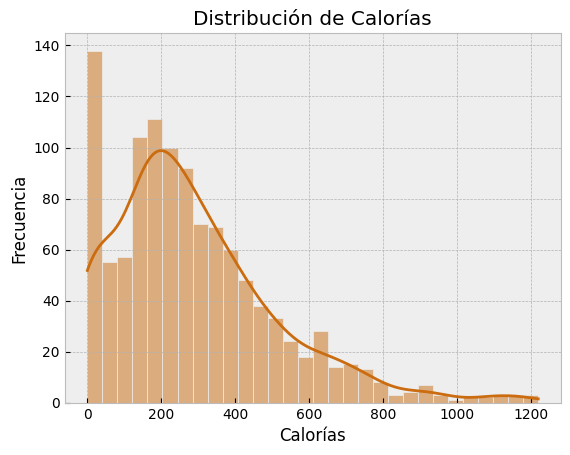

In [10]:
# Resumen Visual de las Calorías
sns.histplot(df['calorias'], bins=30, kde=True, color='#CA6C0F')
plt.title('Distribución de Calorías')
plt.xlabel('Calorías')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Obtener los alimentos más calóricos
top_caloricos = df[['compania', 'producto', 'calorias']].sort_values(by='calorias', ascending=False).head(10)
print(top_caloricos)

        compania                                          producto  calorias
334  Burger King              Triple Whopper® Sandwich with Cheese    1220.0
730          KFC                             Potato Salad (Family)    1200.0
337  Burger King                       Cheddar Bacon King Sandwich    1190.0
127   McDonald’s      Chocolate Triple Thick® Shake (32 fl oz cup)    1160.0
336  Burger King                               Bacon King Sandwich    1150.0
88    McDonald’s  Big Breakfast with Hotcakes (Large Size Biscuit)    1150.0
333  Burger King                          Triple Whopper® Sandwich    1130.0
140   McDonald’s        Vanilla Triple Thick Shake® (32 fl oz cup)    1110.0
136   McDonald’s     Strawberry Triple Thick® Shake (32 fl oz cup)    1110.0
521      Wendy’s                                     Dave’s Triple    1090.0


#### Conclusión: Promedio de Calorías por Cadena

- **Burger King** lidera con el promedio más alto de calorías, seguido por Wendy's y Taco Bell.
- **KFC** tiene el promedio más bajo entre las cadenas analizadas.
- Las diferencias en los promedios sugieren que las opciones del menú varían significativamente en contenido calórico según la cadena.

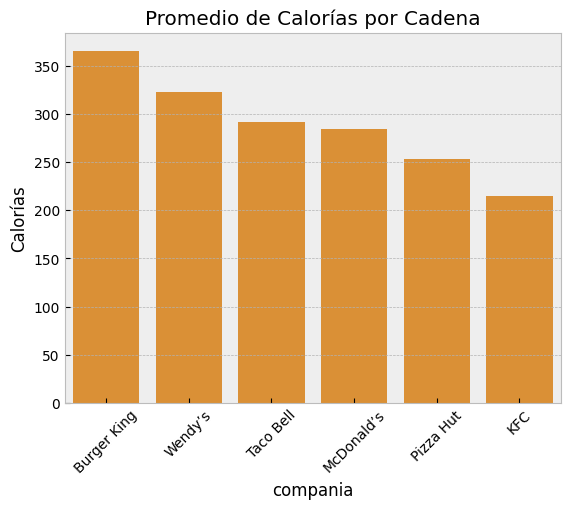

In [12]:
calorias_por_compania = df.groupby('compania')['calorias'].mean().sort_values(ascending=False)

# Visualización de las calorías promedio por compañía
sns.barplot(x=calorias_por_compania.index, y=calorias_por_compania.values, color='#F5921B')
plt.xticks(rotation=45)
plt.title('Promedio de Calorías por Cadena')
plt.ylabel('Calorías')
plt.show()

#### Conclusión: Calorías & Sodio

- **Relación Positiva Fuerte**: Existe una correlación alta (0.73) y significativa (p-valor: 2.14e-189), indicando que a mayor contenido calórico, los niveles de sodio tienden a ser más altos.

- **Distribución de los Datos**:
  - La mayoría de los alimentos tienen niveles de sodio dentro del rango típico (menores a 800 mg).
  - A partir de **400 calorías**, el sodio muestra un incremento considerable, con algunos alimentos superando los **2000 mg**.

- **Valores Atípicos**: Existen productos con combinaciones extremas de calorías y sodio (más de **2500 mg de sodio**), lo que podría estar relacionado con alimentos ultraprocesados.

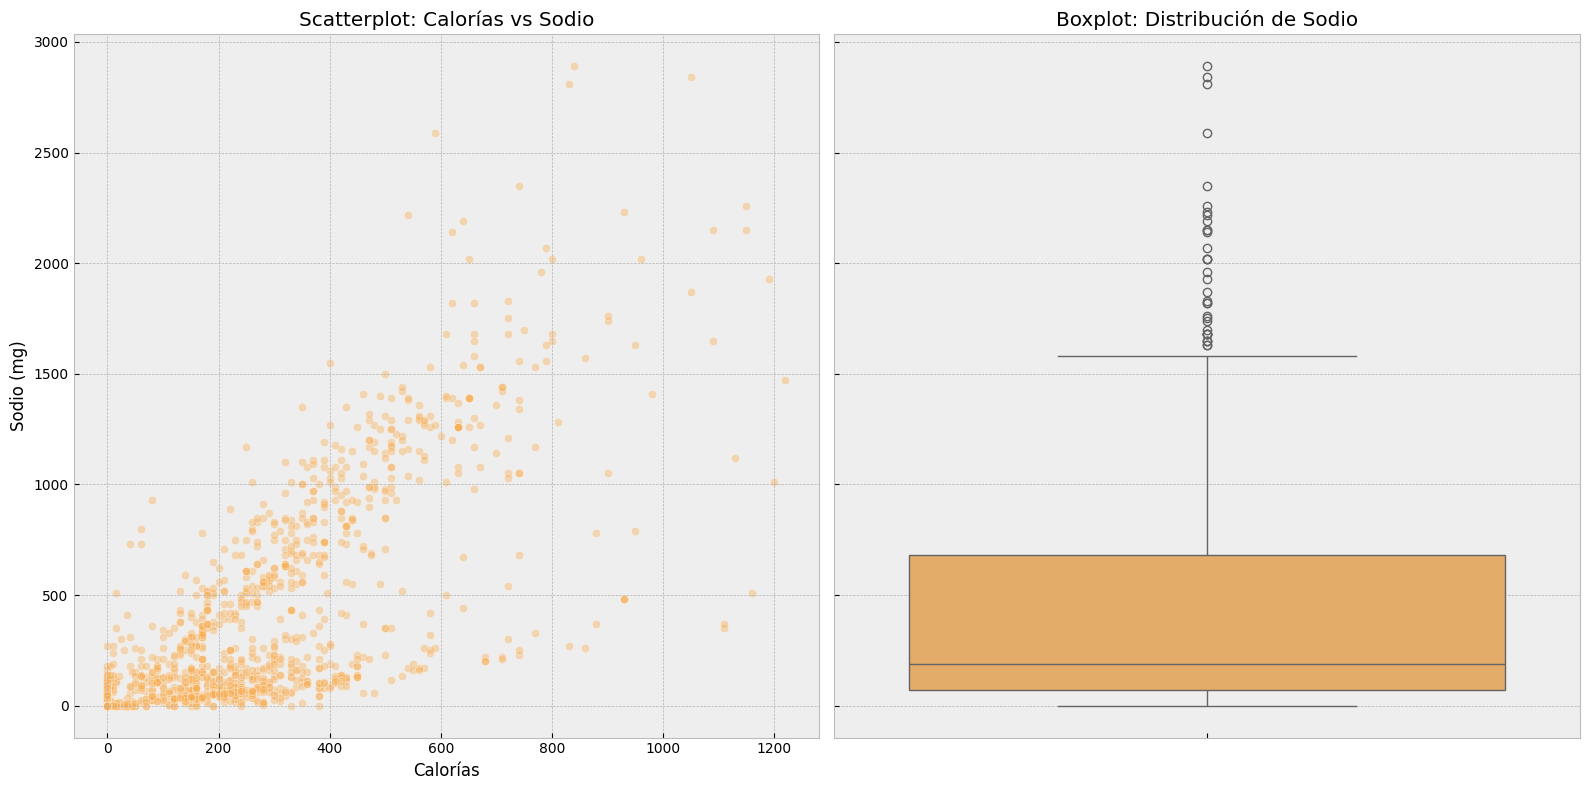

Correlación: 0.73, p-valor: 2.14e-189


In [13]:
# Crear la figura y ejes compartidos
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Scatterplot: Calorías vs Sodio
sns.scatterplot(data=df, x='calorias', y='sodio', ax=ax[0], alpha=0.4, color='#F8AE54')
ax[0].set_title('Scatterplot: Calorías vs Sodio')
ax[0].set_xlabel('Calorías')
ax[0].set_ylabel('Sodio (mg)')

# Boxplot: Distribución de Sodio
sns.boxplot(data=df, y='sodio', ax=ax[1], color='#F8AE54')
ax[1].set_title('Boxplot: Distribución de Sodio')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

# Correlación de Pearson
corr, p_val = stats.pearsonr(df['calorias'], df['sodio'])
print(f"Correlación: {corr:.2f}, p-valor: {p_val:.2e}")

#### Conclusiones: Grasas Saturadas & Colesterol

- **Relación Positiva Moderada**: La correlación de Pearson es 0.63, indicando una relación positiva moderada entre las grasas saturadas y el colesterol. Este resultado es estadísticamente significativo (p-valor: 5.58e-126).

- **Distribución de los Datos**:
  - La mayoría de los alimentos tienen niveles de colesterol menores a **200 mg** y grasas saturadas inferiores a **10 g**, con alta concentración en este rango.
  - A partir de **10 g de grasas saturadas**, los niveles de colesterol presentan mayor dispersión, con algunos valores superiores a **400 mg**.

- **Valores Atípicos**: Existen alimentos con niveles elevados de colesterol (más de **500 mg**) y grasas saturadas (superiores a **20 g**), representando posibles productos específicos o excepciones.

- **Implicación General**: Aunque existe una relación positiva, la dispersión sugiere que otros factores podrían influir en los niveles de colesterol. Los valores atípicos requieren análisis adicional.

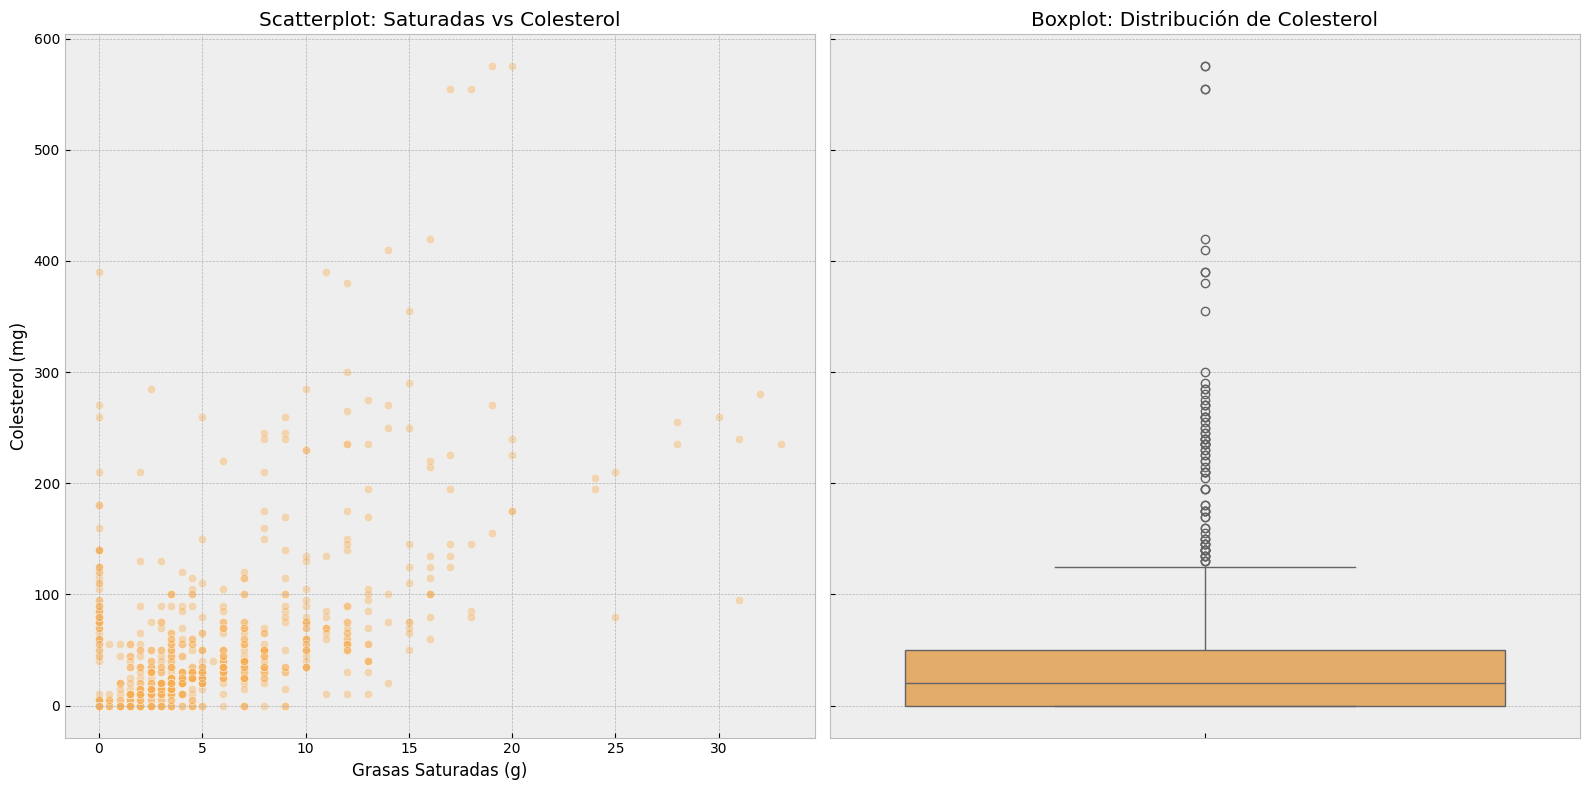

Correlación: 0.63, p-valor: 5.58e-126


In [14]:
# Crear la figura y ejes compartidos
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Scatterplot: Grasas Saturadas vs Colesterol
sns.scatterplot(data=df, x='grasa_saturada', y='colesterol', ax=ax[0], alpha=0.4, color='#F8AE54')
ax[0].set_title('Scatterplot: Saturadas vs Colesterol')
ax[0].set_xlabel('Grasas Saturadas (g)')
ax[0].set_ylabel('Colesterol (mg)')

# Boxplot: Distribución de Colesterol
sns.boxplot(data=df, y='colesterol', ax=ax[1], color='#F8AE54')
ax[1].set_title('Boxplot: Distribución de Colesterol')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

# Correlación de Pearson
corr, p_val = stats.pearsonr(df['grasa_saturada'], df['colesterol'])
print(f"Correlación: {corr:.2f}, p-valor: {p_val:.2e}")
